In this file, we will predict the migration of humans between countries. Human migration is a type of human mobility, where a journey involves a person moving to change their domicile.

Predicting human migration as accurately as possible is important in 
* city planning applications, 
* international trade, 
* the spread of infectious diseases, 
* conservation planning, and 
* public policymaking.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.naive_bayes import GaussianNB

Let’s see what the data looks like: We’d like to turn our attention to the `Measure`, `Country` and `CitizenShip` column. If we want to get a prediction result, we need to convert all of these string values to an integer:

In [3]:
data = pd.read_csv('migration_nz.csv')
data.head(10)

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0
5,Arrivals,Antarctica,Total All Citizenships,1979,13.0
6,Arrivals,American Samoa,New Zealand Citizen,1979,17.0
7,Arrivals,American Samoa,Australian Citizen,1979,4.0
8,Arrivals,American Samoa,Total All Citizenships,1979,30.0
9,Arrivals,Australia,New Zealand Citizen,1979,8224.0


But first, let’s see the unique values we have in the `Measure` column:

In [4]:
data['Measure'].unique()

array(['Arrivals', 'Departures', 'Net'], dtype=object)

Now we need to give each unique string value its unique integer value: in case there are not that many values, it is possible to use the `replace` function:

In [5]:
data['Measure'].replace("Arrivals",0,inplace=True)
data['Measure'].replace("Departures",1,inplace=True)
data['Measure'].replace("Net",2,inplace=True)

Now let’s check if everything has been correctly assigned:

In [7]:
data['Measure'].unique()

array([0, 1, 2], dtype=int64)

In this case, we have about 250 unique countries:

In [8]:
data['Country'].unique()

array(['Oceania', 'Antarctica', 'American Samoa', 'Australia',
       'Cocos Islands', 'Cook Islands', 'Christmas Island', 'Fiji',
       'Micronesia', 'Guam', 'Kiribati', 'Marshall Islands',
       'Northern Mariana Islands', 'New Caledonia', 'Norfolk Island',
       'Nauru', 'Niue', 'New Zealand', 'French Polynesia',
       'Papua New Guinea', 'Pitcairn Island', 'Palau', 'Solomon Islands',
       'French Southern Territories', 'Tokelau', 'Tonga', 'Tuvalu',
       'Vanuatu', 'Wallis and Futuna', 'Samoa', 'Asia', 'Afghanistan',
       'Armenia', 'Azerbaijan', 'Bangladesh', 'Brunei Darussalam',
       'Bhutan', 'China', 'Georgia', 'Hong Kong', 'Indonesia', 'India',
       'Japan', 'Kyrgyzstan', 'Cambodia', 'North Korea', 'South Korea',
       'Kazakhstan', 'Laos', 'Sri Lanka', 'Myanmar', 'Mongolia', 'Macau',
       'Maldives', 'Malaysia', 'Nepal', 'Philippines', 'Pakistan',
       'Singapore', 'Thailand', 'Tajikistan', 'Timor-Leste',
       'Turkmenistan', 'Taiwan', 'Uzbekistan', 'Vietn

Now we need to assign each unique string value its unique integer value:

In [9]:
data['CountryID'] = pd.factorize(data.Country)[0]
data['CitID'] = pd.factorize(data.Citizenship)[0]

Let’s see if everything is okay:

In [11]:
data['CountryID'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Another problem is that we have some missing values. Let’s see how many and where exactly they are:

In [12]:
data.isnull().sum()

Measure         0
Country         0
Citizenship     0
Year            0
Value          72
CountryID       0
CitID           0
dtype: int64

Now, we will simply fill these missing values with the **median** values:

In [13]:
data["Value"].fillna(data["Value"].median(),inplace=True)

Now, let’s see if everything is fine so far:

In [14]:
data.isnull().sum()

Measure        0
Country        0
Citizenship    0
Year           0
Value          0
CountryID      0
CitID          0
dtype: int64

### Split The Data into Train and Test sets

Now, we will split the data into 70 percent training and 30 percent test set:

In [15]:
data.drop('Country', axis=1, inplace=True)
data.drop('Citizenship', axis=1, inplace=True)

In [18]:
X= data[['CountryID','Measure','Year','CitID']].values
Y= data['Value'].values
X_train, X_test, y_train, y_test = train_test_split(
  X, Y, test_size=0.3, random_state=9)

### Predict Migration
Now, let’s predict migration using our Machine Learning algorithm and visualize the results:

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=70,max_features = 3,max_depth=5,n_jobs=-1)
rf.fit(X_train ,y_train)
rf.score(X_test, y_test)

0.7459654548638597

In [20]:
X = data[['CountryID','Measure','Year','CitID']]
Y = data['Value']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=9)
grouped = data.groupby(['Year']).aggregate({'Value' : 'sum'})

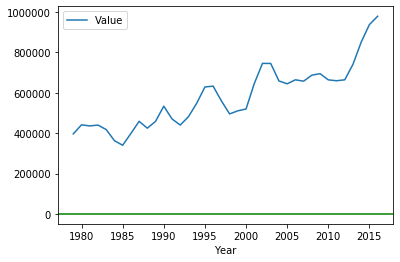

In [22]:
#Growth of migration to New-Zeland by year
grouped.plot(kind='line');plt.axhline(0, color='g')
plt.show()

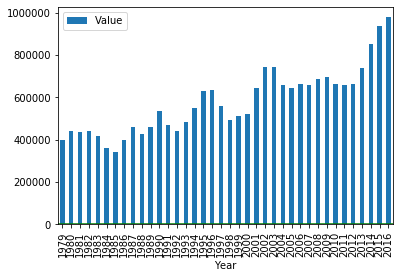

In [24]:
grouped.plot(kind='bar');plt.axhline(0, color='g')
plt.show()

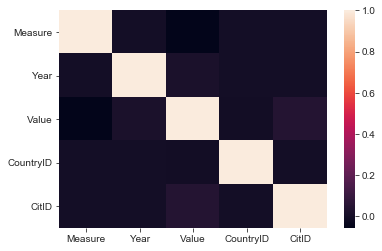

In [36]:
import seaborn as sns
corr = data.corr()
sns.set_style("ticks")
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()